In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv("/content/Ecommerce Customers")

In [ ]:
data.head(5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [ ]:
data.shape

(500, 8)

In [ ]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


<Axes: xlabel='Avg. Session Length'>

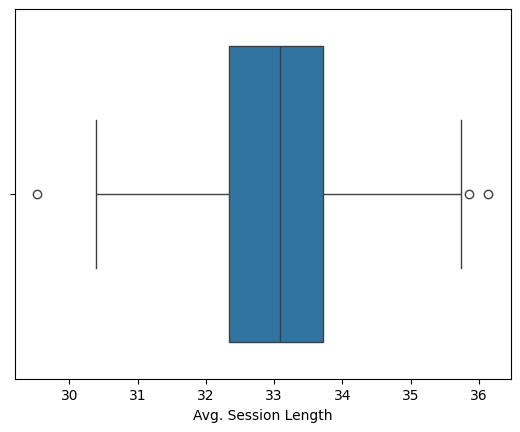

In [ ]:
sns.boxplot(x=data['Avg. Session Length'])

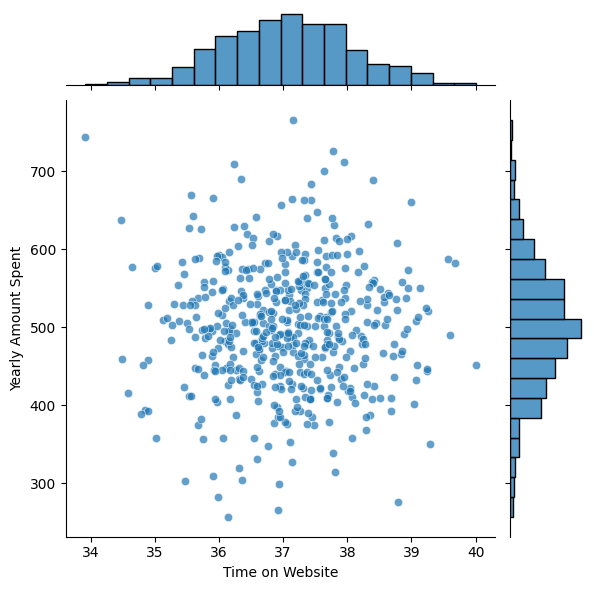

In [16]:
sns.jointplot(data=data,x='Time on Website',y='Yearly Amount Spent',alpha=0.7)

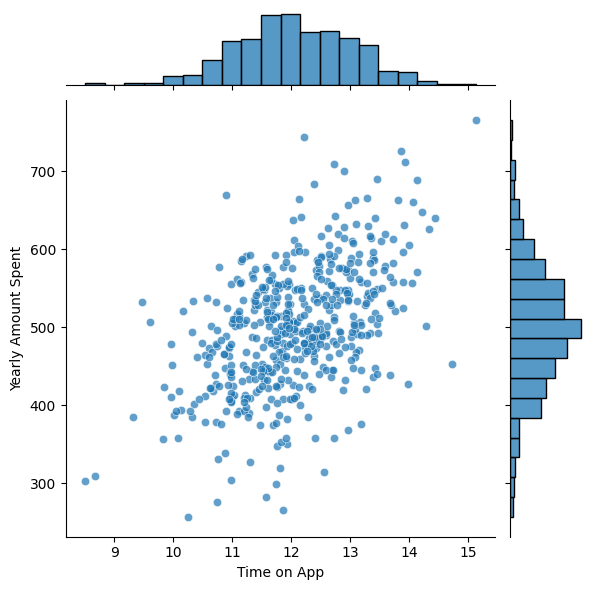

In [17]:
sns.jointplot(data=data,x='Time on App',y='Yearly Amount Spent',alpha=0.7)

<Figure size 600x600 with 0 Axes>

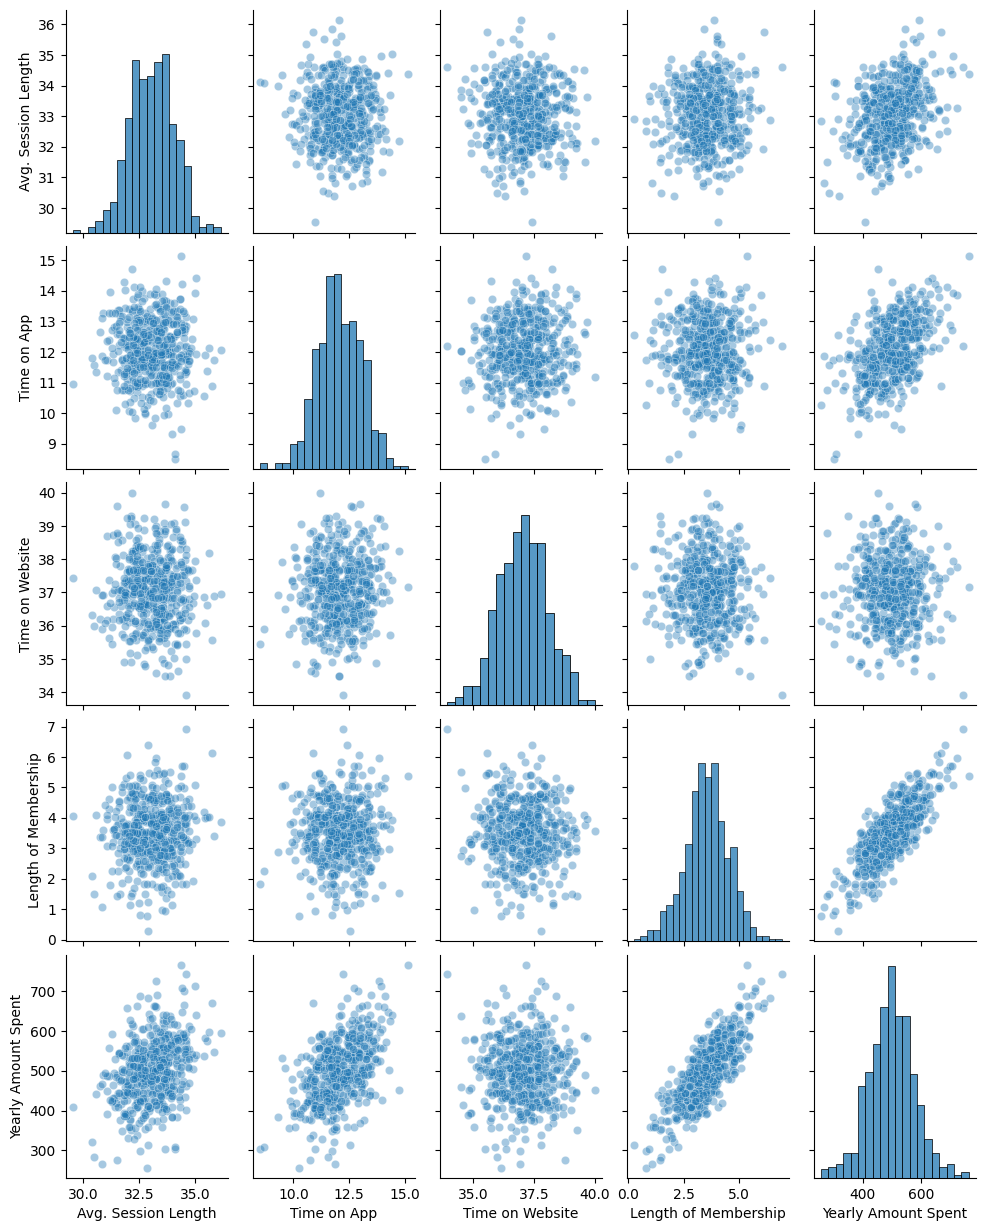

In [25]:
plt.figure(figsize=(6,6))
sns.pairplot(data,kind='scatter',plot_kws={'alpha':0.4}, height=2.5, aspect=0.8)

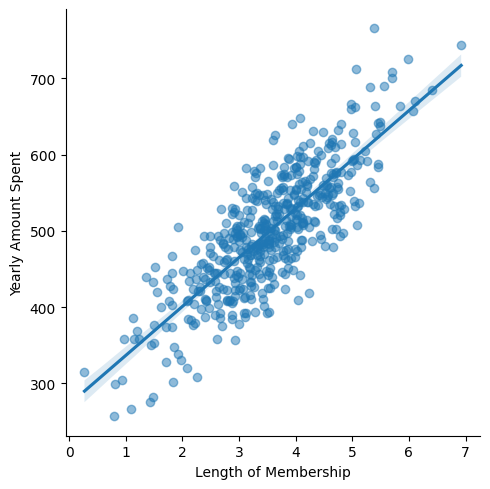

In [30]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data= data,  scatter_kws={'alpha':0.5})

In [31]:
from sklearn.model_selection import train_test_split

In [35]:
X=data.drop(['Email','Address','Avatar','Yearly Amount Spent'],axis=1)
Y=data['Yearly Amount Spent']

In [39]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=42)

In [40]:
X_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
5,33.871038,12.026925,34.476878,5.493507
116,33.925795,12.011022,36.701052,2.753424
45,34.555768,12.170525,39.131097,3.663105
16,32.125387,11.733862,34.894093,3.136133
462,33.503810,11.233415,37.211153,2.320550
...,...,...,...,...
106,32.291756,12.190474,36.152462,3.781823
270,34.006489,12.956277,38.655095,3.275734
348,31.812483,10.886921,34.897828,3.128639
435,32.259973,14.132893,37.023479,3.762070


In [41]:
#train the model
from sklearn.linear_model import LinearRegression

In [42]:
lm=LinearRegression()

In [44]:
lm.fit(X_train, Y_train)

LinearRegression()

In [49]:
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['coef'])
cdf #coefficient represent the weightage of each feature in the model

,coef
Avg. Session Length,25.724256
Time on App,38.597135
Time on Website,0.459148
Length of Membership,61.674732


In [ ]:
#predictions based on coefficients

In [51]:
predictions = lm.predict(X_test)
predictions

array([403.66993069, 542.57756289, 427.06591658, 502.02460425,
       410.12143559, 569.93442508, 531.93431341, 506.29650969,
       408.71870658, 473.97737105, 441.46912726, 425.33703059,
       425.1297229 , 527.61676714, 431.45684016, 424.0769184 ,
       575.76543296, 484.89856554, 458.35936863, 481.96502182,
       502.32441491, 513.63783554, 507.58877002, 646.57464283,
       450.24372141, 496.27043415, 556.40457807, 554.95630839,
       399.64237199, 325.84623136, 532.89783259, 478.12238702,
       501.05701845, 305.97335848, 505.77244448, 483.79591969,
       518.8331528 , 438.18241857, 456.71094234, 471.04609461,
       494.44008972, 445.31155755, 508.78802753, 501.04594193,
       488.83499673, 535.38079541, 595.20129802, 514.04714872,
       280.76758312, 433.10112367, 421.70823427, 481.23640152,
       584.71372272, 608.7748096 , 563.98513427, 494.72804869,
       394.52133407, 456.4197529 , 573.08767515, 499.6984241 ,
       512.83277025, 392.12434043, 480.05057697, 481.54

Text(0.5, 1.0, 'Actual VS Predicted')

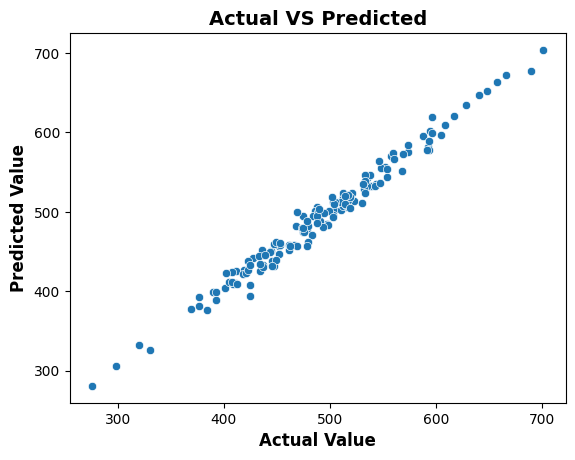

In [62]:
sns.scatterplot(x=Y_test,y=predictions)
plt.xlabel('Actual Value',fontsize=12,fontweight='bold')
plt.ylabel('Predicted Value',fontsize=12,fontweight='bold')
plt.title("Actual VS Predicted",fontsize=14,fontweight='bold')

In [68]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,mean_absolute_error
import math

MAPE (sklearn): 1.758380981791404%


In [72]:
print("Mean Absolute Error ",mean_absolute_error(Y_test, predictions) )
print("Mean Squared Error ",mean_squared_error(Y_test, predictions) )
print("Root Mean Squared Error ",math.sqrt(mean_squared_error(Y_test, predictions)))

Mean Absolute Error  8.426091641432116
Mean Squared Error  103.91554136503333
Root Mean Squared Error  10.193897260863155


<Axes: xlabel='Yearly Amount Spent', ylabel='Count'>

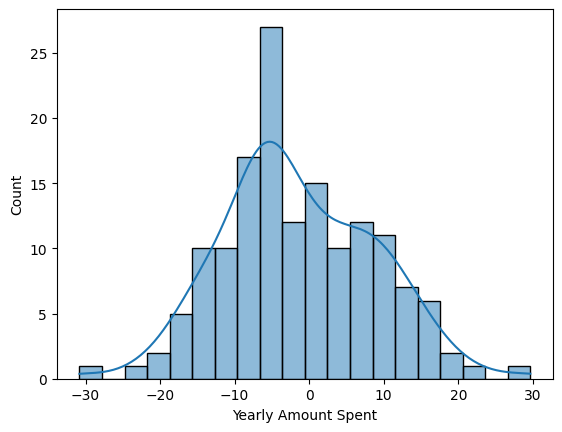

In [75]:
#residuals (it should be in normal distribution)
residuals=Y_test - predictions
sns.histplot(residuals,bins=20,kde=True)

Our residual distribution shows a near-normal shape, Let's check the outliers improve the model.

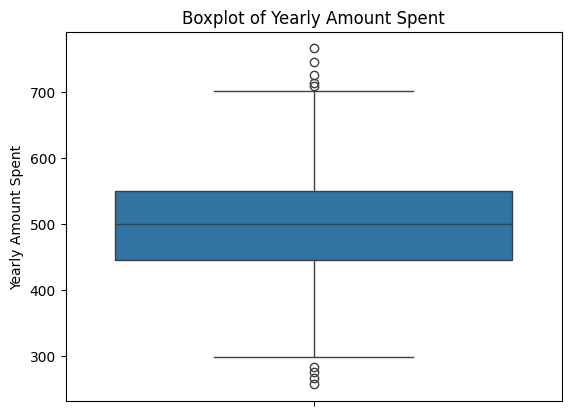

In [77]:
sns.boxplot(y=data['Yearly Amount Spent'])
plt.title("Boxplot of Yearly Amount Spent")
plt.show()

In [78]:
# Now using IQR method we will remove the few outliers
Q1 = data['Yearly Amount Spent'].quantile(0.25)
Q3 = data['Yearly Amount Spent'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_cleaned = data[(data['Yearly Amount Spent'] >= lower_bound) & (data['Yearly Amount Spent'] <= upper_bound)]

Now We will Train our model on this cleaned df and see the effect on MAE

In [96]:
X=data_cleaned.drop(['Email','Address','Avatar','Yearly Amount Spent'],axis=1)
Y=data_cleaned['Yearly Amount Spent']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=42)

In [97]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [98]:
new_predicted=model.predict(X_test)

<Axes: xlabel='Yearly Amount Spent', ylabel='Count'>

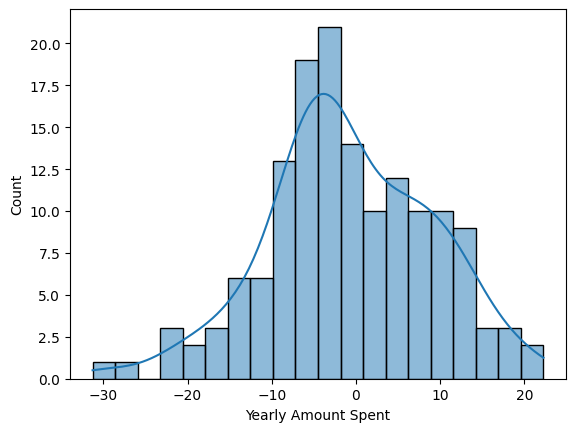

In [101]:
#residuals
residuals=Y_test - new_predicted
sns.histplot(residuals,bins=20,kde=True)

Text(0.5, 1.0, 'Actual VS New Predicted')

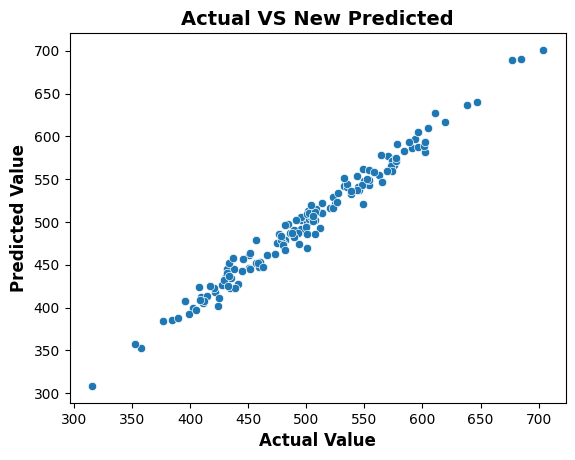

In [99]:
sns.scatterplot(x=new_predicted,y=Y_test)
plt.xlabel('Actual Value',fontsize=12,fontweight='bold')
plt.ylabel('Predicted Value',fontsize=12,fontweight='bold')
plt.title("Actual VS New Predicted",fontsize=14,fontweight='bold')

In [100]:
print("Mean Absolute Error ",mean_absolute_error(Y_test, new_predicted))
print("Mean Squared Error", mean_squared_error(Y_test, new_predicted))
print("Root Mean Squared Error ",math.sqrt(mean_squared_error(Y_test, new_predicted)))

Mean Absolute Error  7.868934080605426
Mean Squared Error 96.15353698543545
Root Mean Squared Error  9.805790992338938


Insights:

Time on App has a strong influence, much more than the website.
📱 This suggests the company should focus more on enhancing the app experience.
Avg. Session Length is important, but not as much as the app and membership duration.
Time on Website has little to no impact, implying website engagement doesn’t translate into spending.